In [36]:
import pandas as pd
import numpy as np

ts = pd.read_csv("../../notebooks/member1/DATA/transactions_processed.csv")
cs = pd.read_csv("../../notebooks/member1/DATA/customers_processed.csv")
ac = pd.read_csv("../../notebooks/member1/DATA/articles_processed.csv")


In [37]:
cs.head()

,Customer_Id,Club_Member_Status,Fashion_News_Frequency,Age,Fn_Label,Active_Label,Age_Band
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,ACTIVE,NONE,49,미구독,비활성,40대
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,ACTIVE,NONE,25,미구독,비활성,20대
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,ACTIVE,NONE,24,미구독,비활성,20대
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,ACTIVE,NONE,54,미구독,비활성,50대
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,ACTIVE,REGULARLY,52,구독,활성,50대


In [23]:
ac.head()

,Article_Id,Product_Code,Prod_Name,Product_Group_Name,Product_Type,Graphical_Appearance,Colour_Group,Perceived_Colour_Value,Perceived_Colour_Master,Department,Index,Index_Group,Section,Garment_Group
0,108775015,108775,Strap Top,Garment Upper Body,Vest Top(253),Solid(1010016),Black(9),Dark(4),Black(5),Jersey Basic(1676),Ladieswear(A),Ladieswear(1),Womens Everyday Basics(16),Jersey Basic(1002)
1,108775044,108775,Strap Top,Garment Upper Body,Vest Top(253),Solid(1010016),White(10),Light(3),White(9),Jersey Basic(1676),Ladieswear(A),Ladieswear(1),Womens Everyday Basics(16),Jersey Basic(1002)
2,108775051,108775,Strap Top (1),Garment Upper Body,Vest Top(253),Stripe(1010017),Off White(11),Dusty Light(1),White(9),Jersey Basic(1676),Ladieswear(A),Ladieswear(1),Womens Everyday Basics(16),Jersey Basic(1002)
3,110065001,110065,Op T-Shirt (Idro),Underwear,Bra(306),Solid(1010016),Black(9),Dark(4),Black(5),Clean Lingerie(1339),Lingeries/Tights(B),Ladieswear(1),Womens Lingerie(61),"Under-, Nightwear(1017)"
4,110065002,110065,Op T-Shirt (Idro),Underwear,Bra(306),Solid(1010016),White(10),Light(3),White(9),Clean Lingerie(1339),Lingeries/Tights(B),Ladieswear(1),Womens Lingerie(61),"Under-, Nightwear(1017)"


In [13]:
cs.isna().sum()

Customer_Id               0
Club_Member_Status        0
Fashion_News_Frequency    0
Age                       0
Fn_Label                  0
Active_Label              0
Age_Band                  0
dtype: int64

In [20]:
ac.isna().sum()

Article_Id                 0
Product_Code               0
Prod_Name                  0
Product_Group_Name         0
Product_Type               0
Graphical_Appearance       0
Colour_Group               0
Perceived_Colour_Value     0
Perceived_Colour_Master    0
Department                 0
Index                      0
Index_Group                0
Section                    0
Garment_Group              0
dtype: int64

In [15]:
ts.isna().sum()

T_Dat               0
Customer_Id         0
Article_Id          0
Price               0
Sales_Channel_Id    0
Channel_Label       0
Year_Month          0
dtype: int64

In [38]:
print("ts:", ts.shape)
print("cs:", cs.shape)
print("ac:", ac.shape)

ts: (1040101, 7)
cs: (1048575, 7)
ac: (105542, 14)


In [39]:
print("\n[ts columns]", ts.columns.tolist())
print("\n[cs columns]", cs.columns.tolist())
print("\n[ac columns]", ac.columns.tolist())


[ts columns] ['T_Dat', 'Customer_Id', 'Article_Id', 'Price', 'Sales_Channel_Id', 'Channel_Label', 'Year_Month']

[cs columns] ['Customer_Id', 'Club_Member_Status', 'Fashion_News_Frequency', 'Age', 'Fn_Label', 'Active_Label', 'Age_Band']

[ac columns] ['Article_Id', 'Product_Code', 'Prod_Name', 'Product_Group_Name', 'Product_Type', 'Graphical_Appearance', 'Colour_Group', 'Perceived_Colour_Value', 'Perceived_Colour_Master', 'Department', 'Index', 'Index_Group', 'Section', 'Garment_Group']


In [51]:
import pandas as pd

# 1) 타입 정리 (핵심: 날짜/가격/조인키)
ts = ts.copy()
cs = cs.copy()
ac = ac.copy()

# 날짜
ts["T_Dat"] = pd.to_datetime(ts["T_Dat"], errors="coerce")

# Year_Month는 T_Dat 기준으로 "YYYY-MM"로 통일 (이미 있어도 덮어씀)
ts["Year_Month"] = ts["T_Dat"].dt.to_period("M").astype(str)

# 가격 (숫자로)
ts["Price"] = pd.to_numeric(ts["Price"], errors="coerce")

# 조인 키 타입 통일
# Customer_Id는 길이가 긴 문자열이니까 문자열로 통일
ts["Customer_Id"] = ts["Customer_Id"].astype("string")
cs["Customer_Id"] = cs["Customer_Id"].astype("string")

# Article_Id는 숫자 형태로 통일 (혹시 문자열로 들어왔으면 숫자로)
ts["Article_Id"] = pd.to_numeric(ts["Article_Id"], errors="coerce").astype("Int64")
ac["Article_Id"] = pd.to_numeric(ac["Article_Id"], errors="coerce").astype("Int64")

In [ ]:
ts.columns = ts.columns.str.strip().str.title().str.replace(" ", "_")
cs.columns = cs.columns.str.strip().str.title().str.replace(" ", "_")
ac.columns = ac.columns.str.strip().str.title().str.replace(" ", "_")


주제 1. 겨울시즌 의류 아우터/부츠/장갑류 등 매출 비중이 언제부터 확 올라가나?
=> 결과에 따른 겨울시즌 의류 할인 및 상품 진열 등 인사이트 도출 가능

In [ ]:
# (1) transactions + articles
ac_cols = [
    "Article_Id",
    "Product_Group_Name",
    "Product_Type",
    "Garment_Group",
    "Index",
    "Section",
    "Department",
    "Colour_Group",
    "Perceived_Colour_Value",
    "Graphical_Appearance",
    "Prod_Name",
]
ac_cols = [c for c in ac_cols if c in ac.columns]

ts_ac = ts.merge(
    ac[ac_cols],
    on="Article_Id",
    how="left",
    validate="m:1"   # transactions는 여러행(m), articles는 1행(1)
)

print("ts:", ts.shape, " -> ts_ac:", ts_ac.shape)

# 상품정보 NA율 확인 (조인 제대로 붙었는지 핵심 체크)
check_cols = ["Prod_Name", "Product_Group_Name", "Product_Type", "Garment_Group"]
check_cols = [c for c in check_cols if c in ts_ac.columns]

print("\n[Article join NA rate]")
for c in check_cols:
    print(c, "NA rate =", ts_ac[c].isna().mean())

ts_ac.head()


ts: (1040101, 7)  -> ts_ac: (1040101, 17)

[Article join NA rate]
Prod_Name NA rate = 0.0
Product_Group_Name NA rate = 0.0
Product_Type NA rate = 0.0
Garment_Group NA rate = 0.0


,T_Dat,Customer_Id,Article_Id,Price,Sales_Channel_Id,Channel_Label,Year_Month,Product_Group_Name,Product_Type,Garment_Group,Index,Section,Department,Colour_Group,Perceived_Colour_Value,Graphical_Appearance,Prod_Name
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,온라인,2019-11,Garment Upper Body,Sweater(252),Jersey Fancy(1005),Divided(D),Divided Collection(53),Tops Fancy Jersey(1640),Dark Blue(73),Dark(4),Placement Print(1010014),Zebra Cf Tvp
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,온라인,2019-05,Garment Upper Body,Top(254),Jersey Fancy(1005),Ladieswear(A),Womens Casual(6),Jersey(1660),White(10),Light(3),Stripe(1010017),Bubble Wrap Top
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,온라인,2019-05,Garment Lower Body,Shorts(274),Shorts(1025),Menswear(F),Contemporary Casual(21),Shorts(5658),Dark Blue(73),Dark(4),Chambray(1010024),Teddy Jogger.
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,온라인,2019-08,Accessories,Bag(66),Accessories(1019),Ladies Accessories(C),Womens Big Accessories(65),Bags(3209),Black(9),Dark(4),Solid(1010016),Yuki Shopper
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,오프라인,2019-08,Socks & Tights,Socks(302),Socks And Tights(1021),Menswear(F),Men Underwear(26),Socks Wall(5999),White(10),Light(3),All Over Pattern(1010001),1Pk Sportsock


In [43]:
# (2) (ts + ac) + cs
cs_cols = ["Customer_Id", "Age", "Age_Band", "Club_Member_Status", "Fashion_News_Frequency"]
cs_cols = [c for c in cs_cols if c in cs.columns]

merged = ts_ac.merge(
    cs[cs_cols],
    on="Customer_Id",
    how="left",
    validate="m:1"   # transactions 여러행(m), customers 유니크(1)
)

print("ts_ac:", ts_ac.shape, " -> merged:", merged.shape)

print("\n[Customer join NA rate]")
for c in ["Age", "Age_Band", "Club_Member_Status"]:
    if c in merged.columns:
        print(c, "NA rate =", merged[c].isna().mean())

merged.head()

ts_ac: (1040101, 17)  -> merged: (1040101, 21)

[Customer join NA rate]
Age NA rate = 0.22472240676626598
Age_Band NA rate = 0.22472240676626598
Club_Member_Status NA rate = 0.22472240676626598


,T_Dat,Customer_Id,Article_Id,Price,Sales_Channel_Id,Channel_Label,Year_Month,Product_Group_Name,Product_Type,Garment_Group,...,Section,Department,Colour_Group,Perceived_Colour_Value,Graphical_Appearance,Prod_Name,Age,Age_Band,Club_Member_Status,Fashion_News_Frequency
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,온라인,2019-11,Garment Upper Body,Sweater(252),Jersey Fancy(1005),...,Divided Collection(53),Tops Fancy Jersey(1640),Dark Blue(73),Dark(4),Placement Print(1010014),Zebra Cf Tvp,51.0,50대,ACTIVE,REGULARLY
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,온라인,2019-05,Garment Upper Body,Top(254),Jersey Fancy(1005),...,Womens Casual(6),Jersey(1660),White(10),Light(3),Stripe(1010017),Bubble Wrap Top,28.0,20대,ACTIVE,NONE
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,온라인,2019-05,Garment Lower Body,Shorts(274),Shorts(1025),...,Contemporary Casual(21),Shorts(5658),Dark Blue(73),Dark(4),Chambray(1010024),Teddy Jogger.,37.0,30대,ACTIVE,REGULARLY
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,온라인,2019-08,Accessories,Bag(66),Accessories(1019),...,Womens Big Accessories(65),Bags(3209),Black(9),Dark(4),Solid(1010016),Yuki Shopper,19.0,10대,ACTIVE,NONE
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,오프라인,2019-08,Socks & Tights,Socks(302),Socks And Tights(1021),...,Men Underwear(26),Socks Wall(5999),White(10),Light(3),All Over Pattern(1010001),1Pk Sportsock,35.0,30대,ACTIVE,NONE


In [45]:
import pandas as pd

# 1) 고객 테이블에서 조인에 쓸 컬럼만 남기기
keep_cs = ["Customer_Id", "Age", "Age_Band", "Club_Member_Status"]
cs_join = cs[keep_cs].copy()

# 2) ts에 있는데 cs에는 없는 Customer_Id 찾기
missing_ids = pd.Index(ts["Customer_Id"].unique()).difference(cs_join["Customer_Id"])
print("Missing unique customers (in ts not in cs):", len(missing_ids))

# 3) 없는 고객을 UNKNOWN row로 추가(거래는 살리고, 고객정보는 Unknown 처리)
pad = pd.DataFrame({"Customer_Id": missing_ids})
pad["Age"] = pd.NA
pad["Age_Band"] = "UNKNOWN"
pad["Club_Member_Status"] = "UNKNOWN"

cs_join2 = pd.concat([cs_join, pad], ignore_index=True)

# 4) 이제 다시 조인
merged2 = ts_ac.merge(cs_join2, on="Customer_Id", how="left")

# 5) NA 확인 (이제 거의 0이어야 정상)
print("[Customer join NA rate after padding]")
for col in ["Age", "Age_Band", "Club_Member_Status"]:
    print(col, "NA rate =", merged2[col].isna().mean())

merged2.head()


Missing unique customers (in ts not in cs): 104675
[Customer join NA rate after padding]
Age NA rate = 0.22472240676626598
Age_Band NA rate = 0.0
Club_Member_Status NA rate = 0.0


,T_Dat,Customer_Id,Article_Id,Price,Sales_Channel_Id,Channel_Label,Year_Month,Product_Group_Name,Product_Type,Garment_Group,Index,Section,Department,Colour_Group,Perceived_Colour_Value,Graphical_Appearance,Prod_Name,Age,Age_Band,Club_Member_Status
0,2019-11-05,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2,온라인,2019-11,Garment Upper Body,Sweater(252),Jersey Fancy(1005),Divided(D),Divided Collection(53),Tops Fancy Jersey(1640),Dark Blue(73),Dark(4),Placement Print(1010014),Zebra Cf Tvp,51,50대,ACTIVE
1,2019-05-22,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2,온라인,2019-05,Garment Upper Body,Top(254),Jersey Fancy(1005),Ladieswear(A),Womens Casual(6),Jersey(1660),White(10),Light(3),Stripe(1010017),Bubble Wrap Top,28,20대,ACTIVE
2,2019-05-10,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2,온라인,2019-05,Garment Lower Body,Shorts(274),Shorts(1025),Menswear(F),Contemporary Casual(21),Shorts(5658),Dark Blue(73),Dark(4),Chambray(1010024),Teddy Jogger.,37,30대,ACTIVE
3,2019-08-26,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2,온라인,2019-08,Accessories,Bag(66),Accessories(1019),Ladies Accessories(C),Womens Big Accessories(65),Bags(3209),Black(9),Dark(4),Solid(1010016),Yuki Shopper,19,10대,ACTIVE
4,2019-08-10,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,1,오프라인,2019-08,Socks & Tights,Socks(302),Socks And Tights(1021),Menswear(F),Men Underwear(26),Socks Wall(5999),White(10),Light(3),All Over Pattern(1010001),1Pk Sportsock,35,30대,ACTIVE


In [ ]:
import pandas as pd
import numpy as np

df = ts_ac.copy()  

# 1) 겨울 판별에 사용할 텍스트 컬럼들
text_cols = ["Product_Group_Name", "Product_Type", "Garment_Group", "Department", "Section"]
use_cols = [c for c in text_cols if c in df.columns]

for c in use_cols:
    df[c] = df[c].astype("string").fillna("")

# 2) 겨울 키워드(일단 넓게)
winter_keywords = [
    "Coat", "Jacket", "Park", "Parka", "Down", "Padded", "Quilt",
    "Boot", "Glove", "Mittens", "Scarf", "Beanie", "Hat", "Cap",
    "Knit", "Wool", "Fleece", "Sweater", "Cardigan", "Hoodie",
    "Thermal", "Long john", "Turtleneck"
]

pattern = "|".join([k.replace(" ", r"\s*") for k in winter_keywords])

# 3) 겨울 플래그
winter_mask = False
for c in use_cols:
    winter_mask = winter_mask | df[c].str.contains(pattern, case=False, regex=True)

df["Is_Winter"] = winter_mask

print("Total rows:", len(df))
print("Winter rows:", int(df["Is_Winter"].sum()))
print("Winter share (rows):", float(df["Is_Winter"].mean()))

# 겨울로 잡힌 것들이 뭔지 상위 확인 
check_col = "Product_Type" if "Product_Type" in df.columns else use_cols[0]
display(df.loc[df["Is_Winter"], check_col].value_counts().head(20))


Total rows: 1040101
Winter rows: 177815
Winter share (rows): 0.17095935875458249


Product_Type
Sweater(252)              91405
Jacket(262)               18964
Hoodie(308)               15218
Cardigan(245)             12075
Blazer(264)                6004
Boots(87)                  6002
Scarf(80)                  5094
Coat(263)                  4499
Top(254)                   2844
Hat/Beanie(75)             2645
Dress(265)                 2231
Vest Top(253)              2207
T-Shirt(255)               1091
Gloves(71)                  998
Cap/Peaked(69)              914
Hat/Brim(76)                909
Trousers(272)               799
Skirt(275)                  788
Hair/Alice Band(74)         438
Outdoor Waistcoat(261)      344
Name: count, dtype: Int64

[Broad] turnpoint candidate (max MoM increase): 2019-09


,Year_Month,Winter_Share,MoM_Delta,Total_Price,Winter_Price
6,2019-07,0.071724,0.014413,2552.035334,183.042423
7,2019-08,0.191674,0.119950,1943.422489,372.503712
8,2019-09,0.367065,0.175391,2559.226862,939.401932
9,2019-10,0.401905,0.034840,2358.486793,947.886542
10,2019-11,0.413993,0.012089,2463.769270,1019.983593


[Narrow] turnpoint candidate (max MoM increase): 2019-09


,Year_Month,Winter_Share,MoM_Delta,Total_Price,Winter_Price
6,2019-07,0.029068,0.003733,2552.035334,74.181424
7,2019-08,0.074722,0.045654,1943.422489,145.215763
8,2019-09,0.139664,0.064943,2559.226862,357.432373
9,2019-10,0.150807,0.011143,2358.486793,355.676508
10,2019-11,0.163170,0.012363,2463.769270,402.014441


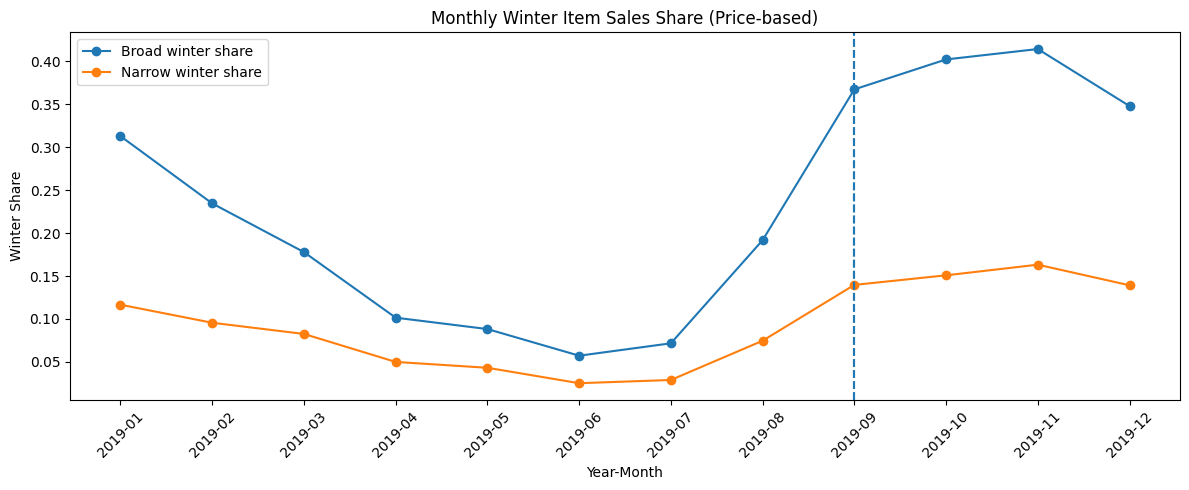

In [ ]:
import pandas as pd
import numpy as np

# df는 ts_ac(거래+상품) 기준
df = ts_ac.copy()

# 안전 처리
df["Year_Month"] = df["Year_Month"].astype("string")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# 월 datetime
df["Ym_dt"] = pd.to_datetime(df["Year_Month"] + "-01", errors="coerce")

# ----- (1) Broad 겨울 플래그 -----
text_cols = ["Product_Group_Name", "Product_Type", "Garment_Group", "Department", "Section"]
use_cols = [c for c in text_cols if c in df.columns]
for c in use_cols:
    df[c] = df[c].astype("string").fillna("")

winter_keywords_broad = [
    "Coat", "Jacket", "Park", "Parka", "Down", "Padded", "Quilt",
    "Boot", "Glove", "Mittens", "Scarf", "Beanie", "Hat", "Cap",
    "Knit", "Wool", "Fleece", "Sweater", "Cardigan", "Hoodie",
    "Thermal", "Long john", "Turtleneck"
]
pattern_broad = "|".join([k.replace(" ", r"\s*") for k in winter_keywords_broad])

winter_mask_broad = False
for c in use_cols:
    winter_mask_broad = winter_mask_broad | df[c].str.contains(pattern_broad, case=False, regex=True)

df["Is_Winter_Broad"] = winter_mask_broad

# ----- (2) Narrow 겨울 플래그: “겨울 준비”에 더 가까운 것만 -----
narrow_keywords = [
    "Coat", "Jacket", "Park", "Parka", "Down", "Padded", "Quilt",
    "Boot", "Glove", "Mittens", "Scarf", "Beanie"
]
pattern_narrow = "|".join([k.replace(" ", r"\s*") for k in narrow_keywords])

winter_mask_narrow = False
for c in use_cols:
    winter_mask_narrow = winter_mask_narrow | df[c].str.contains(pattern_narrow, case=False, regex=True)

df["Is_Winter_Narrow"] = winter_mask_narrow

# ----- (3) 월별 비중 계산 함수 -----
def monthly_share(df, flag_col):
    m = df.groupby("Ym_dt", dropna=True).agg(
        Total_Price=("Price", "sum"),
        Winter_Price=(flag_col, lambda x: np.nan)  # placeholder
    )
    # Winter_Price 계산 (flag True인 price만)
    winter_price = df.loc[df[flag_col] == True].groupby("Ym_dt")["Price"].sum()
    m["Winter_Price"] = winter_price
    m["Winter_Price"] = m["Winter_Price"].fillna(0)

    m["Winter_Share"] = m["Winter_Price"] / m["Total_Price"]
    m = m.sort_index().reset_index().rename(columns={"Ym_dt": "Month"})
    m["Year_Month"] = m["Month"].dt.strftime("%Y-%m")
    m["MoM_Delta"] = m["Winter_Share"].diff()
    m["MA3"] = m["Winter_Share"].rolling(3).mean()
    return m

monthly_broad = monthly_share(df, "Is_Winter_Broad")
monthly_narrow = monthly_share(df, "Is_Winter_Narrow")

# ----- (4) 전환점 후보: MoM 증가폭 최대(가장 급격히 올라가는 달) -----
def pick_turnpoint(monthly):
    turn_idx = monthly["MoM_Delta"].idxmax()
    return monthly.loc[turn_idx, "Year_Month"], turn_idx

turn_broad, idx_broad = pick_turnpoint(monthly_broad)
turn_narrow, idx_narrow = pick_turnpoint(monthly_narrow)

print("[Broad] turnpoint candidate (max MoM increase):", turn_broad)
display(monthly_broad.loc[max(idx_broad-2,0):idx_broad+2, ["Year_Month","Winter_Share","MoM_Delta","Total_Price","Winter_Price"]])

print("[Narrow] turnpoint candidate (max MoM increase):", turn_narrow)
display(monthly_narrow.loc[max(idx_narrow-2,0):idx_narrow+2, ["Year_Month","Winter_Share","MoM_Delta","Total_Price","Winter_Price"]])

# ----- (5) 시각화 -----
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_broad["Year_Month"], monthly_broad["Winter_Share"], marker="o", label="Broad winter share")
plt.plot(monthly_narrow["Year_Month"], monthly_narrow["Winter_Share"], marker="o", label="Narrow winter share")
plt.xticks(rotation=45)
plt.title("Monthly Winter Item Sales Share (Price-based)")
plt.xlabel("Year-Month")
plt.ylabel("Winter Share")

# 전환점 표시(세로선)
plt.axvline(x=turn_broad, linestyle="--")
plt.axvline(x=turn_narrow, linestyle="--")

plt.legend()
plt.tight_layout()
plt.show()


In [48]:

winter_types_broad = [
    "Sweater(252)", "Jacket(262)", "Hoodie(308)", "Cardigan(245)", "Blazer(264)",
    "Boots(87)", "Scarf(80)", "Coat(263)", "Gloves(71)", "Hat/Beanie(75)",
]
winter_types_narrow = ["Coat(263)", "Boots(87)", "Gloves(71)", "Scarf(80)"]  # 예시


In [49]:
import pandas as pd

winter_types = set(winter_types_broad)   # 또는 winter_types_narrow

# 8월/9월 데이터만
m = merged[merged["Year_Month"].isin(["2019-08", "2019-09"])].copy()

# 겨울 상품만 추출
w = m[m["Product_Type"].isin(winter_types)].copy()

# 월-상품유형별 겨울매출(Price 합)
wm = (
    w.groupby(["Year_Month", "Product_Type"], as_index=False)["Price"]
     .sum()
     .rename(columns={"Price": "Winter_Price"})
)

# wide 형태로 2019-08, 2019-09 컬럼 만들기
wide = wm.pivot(index="Product_Type", columns="Year_Month", values="Winter_Price").fillna(0)

# 증가액(9월-8월)
wide["Delta"] = wide.get("2019-09", 0) - wide.get("2019-08", 0)

# Top10
top10 = wide.sort_values("Delta", ascending=False).head(10)

# 보기 좋게 정리
top10_out = (
    top10.reset_index()
         .rename(columns={"2019-08":"Aug_Winter_Price", "2019-09":"Sep_Winter_Price"})
         [["Product_Type", "Aug_Winter_Price", "Sep_Winter_Price", "Delta"]]
)

print("8월→9월 겨울매출 증가액 기여 Top10 (Product_Type)")
display(top10_out)

print("\n(참고) 8→9월 겨울매출 총 증가액:", top10_out["Delta"].sum())


8월→9월 겨울매출 증가액 기여 Top10 (Product_Type)


Year_Month,Product_Type,Aug_Winter_Price,Sep_Winter_Price,Delta
0,Sweater(252),143.540118,396.824847,253.284729
1,Jacket(262),70.948627,168.008441,97.059814
2,Coat(263),18.452559,76.805186,58.352627
3,Hoodie(308),27.371458,72.073390,44.701932
4,Cardigan(245),26.792085,61.331729,34.539644
5,Blazer(264),62.131339,92.081152,29.949813
6,Boots(87),26.413898,50.670424,24.256525
7,Scarf(80),2.987847,11.561780,8.573932
8,Hat/Beanie(75),0.828203,2.879017,2.050814
9,Gloves(71),0.168712,1.193508,1.024797



(참고) 8→9월 겨울매출 총 증가액: 553.794627086


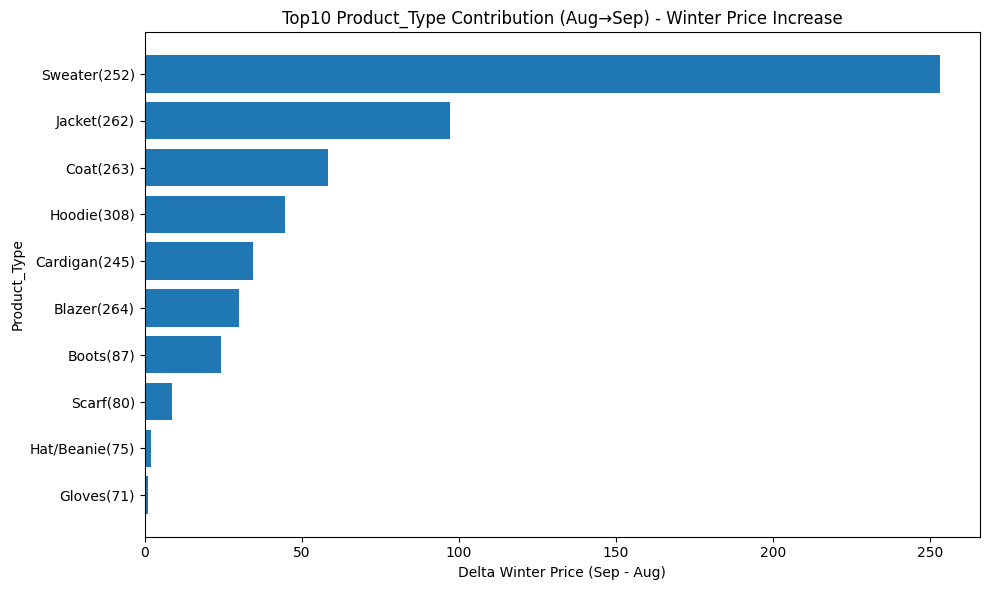

In [ ]:
import matplotlib.pyplot as plt

plot_df = top10_out.sort_values("Delta", ascending=True)  

plt.figure(figsize=(10, 6))
plt.barh(plot_df["Product_Type"], plot_df["Delta"])
plt.title("Top10 Product_Type Contribution (Aug→Sep) - Winter Price Increase")
plt.xlabel("Delta Winter Price (Sep - Aug)")
plt.ylabel("Product_Type")
plt.tight_layout()
plt.show()


주제 2. 상위 20%와 하위 20%의 매출분석 
=> 상위 20%와 하위 20%의 각각 많이 팔리는 물품을 분류하여, 
상위 20프로에게는 많이 팔리는 물품 top5를 온라인 시크릿 쿠폰 형태로 발급 등 구매전략을 세울 수 있음.

In [52]:
import pandas as pd
import numpy as np

# 분석용 베이스 df 선택
base = None
for name in ["merged2", "merged", "ts_ac"]:
    if name in globals():
        base = globals()[name].copy()
        print("Using base df:", name)
        break

if base is None:
    raise ValueError("merged2/merged/ts_ac 중 아무 것도 없음. 조인 셀부터 다시 실행해야 함.")

# 필수 컬럼 체크
need_cols = ["Customer_Id", "Price", "Year_Month", "Product_Type"]
missing = [c for c in need_cols if c not in base.columns]
if missing:
    raise KeyError(f"base df에 필수 컬럼이 없음: {missing}\n현재 컬럼: {base.columns.tolist()}")

# 1) 고객별 총구매금액(Price 합)
cust_sales = (base.groupby("Customer_Id", as_index=False)["Price"]
              .sum()
              .rename(columns={"Price": "Total_Price"}))

# 2) 상/하위 20% 기준선
q20 = cust_sales["Total_Price"].quantile(0.2)
q80 = cust_sales["Total_Price"].quantile(0.8)

# 3) 고객 세그먼트 라벨
cust_sales["Segment"] = np.where(
    cust_sales["Total_Price"] >= q80, "Top20",
    np.where(cust_sales["Total_Price"] <= q20, "Bottom20", "Middle60")
)

# 4) 거래에 세그먼트 붙이기
seg_df = base.merge(cust_sales[["Customer_Id", "Segment"]], on="Customer_Id", how="left")

# 5) Top20 vs Bottom20만 필터
seg_df = seg_df[seg_df["Segment"].isin(["Top20", "Bottom20"])].copy()

# 6) 상품별(물품) 많이 산 것: Product_Type 기준 매출(Price 합)
topN = 12  # 보고 싶은 개수
by_item = (seg_df.groupby(["Segment", "Product_Type"], as_index=False)["Price"]
           .sum()
           .rename(columns={"Price": "Sales"}))

# 각 세그먼트별 Top N만 추출
by_item["rank"] = by_item.groupby("Segment")["Sales"].rank(method="first", ascending=False)
top_items = by_item[by_item["rank"] <= topN].copy()

# 7) “비중(share)”도 같이 만들기(세그먼트 내부에서)
seg_total = top_items.groupby("Segment")["Sales"].transform("sum")
top_items["Share_in_TopN"] = top_items["Sales"] / seg_total

print("q20:", q20, "| q80:", q80)
display(top_items.sort_values(["Segment", "Sales"], ascending=[True, False]).head(30))


Using base df: merged2
q20: 0.016932203 | q80: 0.089745763


,Segment,Product_Type,Sales,rank,Share_in_TopN
85,Bottom20,T-Shirt(255),160.642846,1.0,0.184365
88,Bottom20,Top(254),98.535694,2.0,0.113086
80,Bottom20,Sweater(252),86.048779,3.0,0.098755
98,Bottom20,Vest Top(253),85.399304,4.0,0.098010
94,Bottom20,Underwear Bottom(286),83.294982,5.0,0.095595
82,Bottom20,Swimwear Bottom(59),81.476236,6.0,0.093508
89,Bottom20,Trousers(272),64.384457,7.0,0.073892
71,Bottom20,Shorts(274),52.968406,8.0,0.060790
76,Bottom20,Socks(302),44.036983,9.0,0.050540
23,Bottom20,Dress(265),43.233356,10.0,0.049618


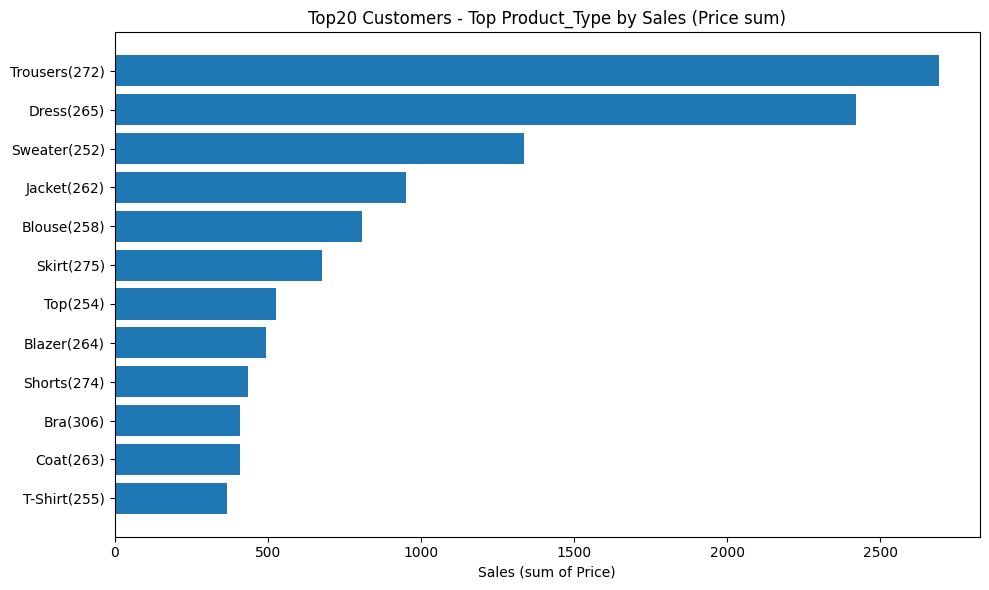

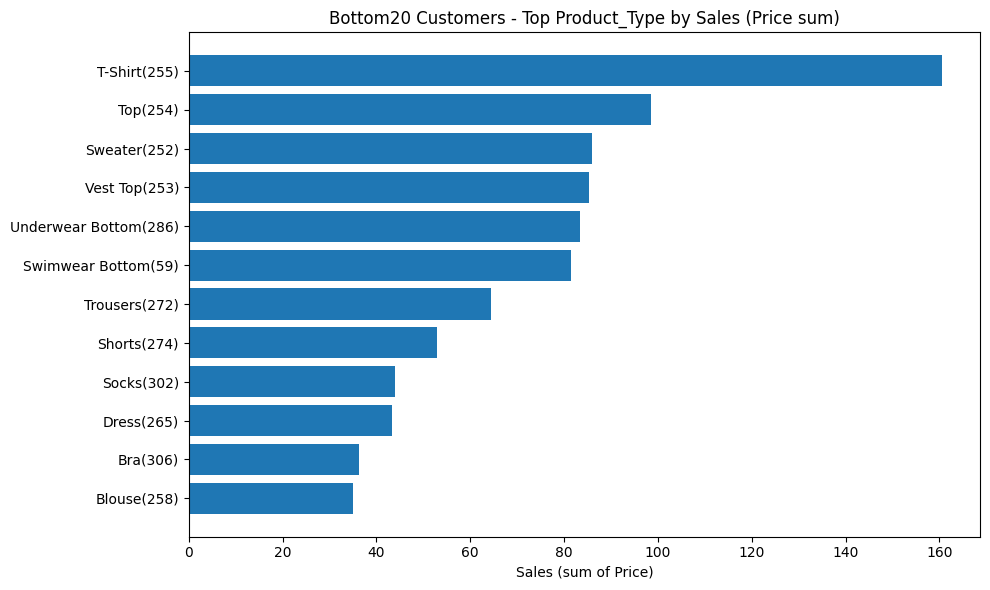

In [53]:
import matplotlib.pyplot as plt

# Top20 / Bottom20 각각 정렬
top20_plot = top_items[top_items["Segment"] == "Top20"].sort_values("Sales", ascending=True)
bot20_plot = top_items[top_items["Segment"] == "Bottom20"].sort_values("Sales", ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(top20_plot["Product_Type"], top20_plot["Sales"])
plt.title("Top20 Customers - Top Product_Type by Sales (Price sum)")
plt.xlabel("Sales (sum of Price)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(bot20_plot["Product_Type"], bot20_plot["Sales"])
plt.title("Bottom20 Customers - Top Product_Type by Sales (Price sum)")
plt.xlabel("Sales (sum of Price)")
plt.tight_layout()
plt.show()


주제3. 상위 20%와 하위 20% 고객층은 각각 뉴스구독여부, 커뮤니케이션 여부에 따라 매출의 영향이 있을까?
=> 매출의 영향이 있는 고객층이 있다면 뉴스구독시, 커뮤니케이션 활발 정도에 따라 베네핏을 줄 수 있음

In [54]:
import pandas as pd
import numpy as np

df = merged2.copy()  # 고객 정보까지 붙은 데이터

# 고객별 총구매금액
cust_sales = (df.groupby("Customer_Id", as_index=False)["Price"]
              .sum()
              .rename(columns={"Price": "Total_Price"}))

q20 = cust_sales["Total_Price"].quantile(0.2)
q80 = cust_sales["Total_Price"].quantile(0.8)

cust_sales["Segment"] = np.where(
    cust_sales["Total_Price"] >= q80, "Top20",
    np.where(cust_sales["Total_Price"] <= q20, "Bottom20", "Middle60")
)

df = df.merge(cust_sales[["Customer_Id", "Segment"]], on="Customer_Id", how="left")
df = df[df["Segment"].isin(["Top20", "Bottom20"])].copy()

print(df["Segment"].value_counts())


Segment
Top20       469724
Bottom20     95652
Name: count, dtype: int64


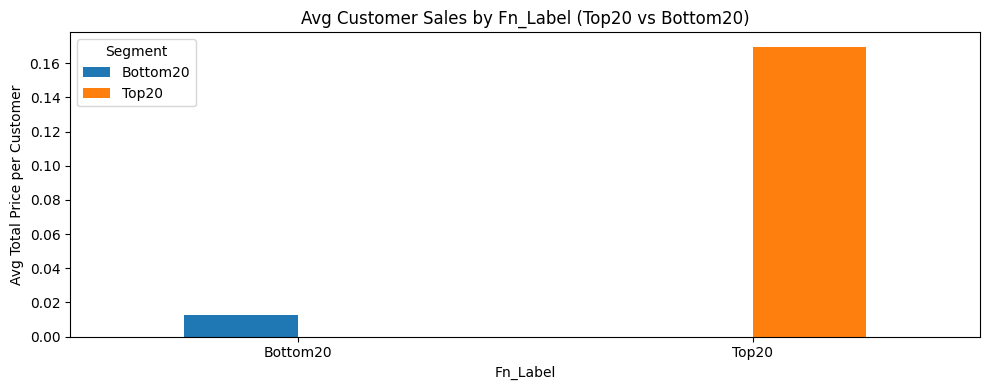

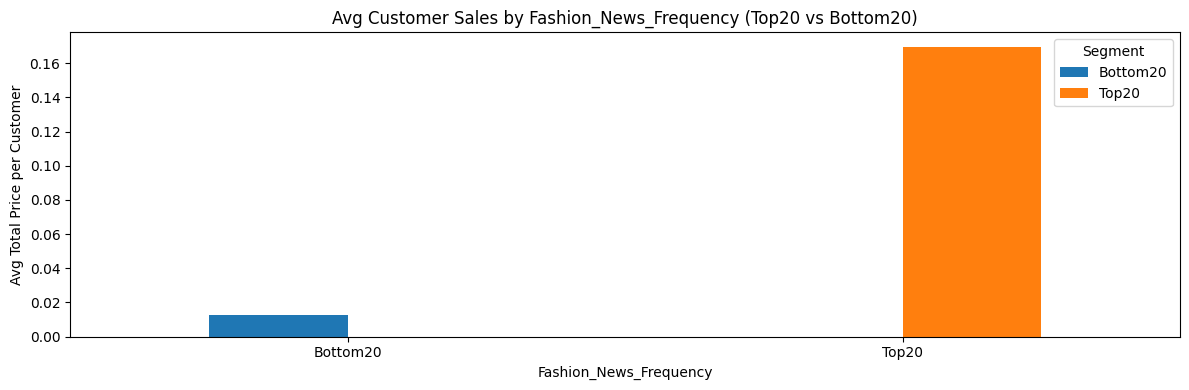

In [ ]:
import matplotlib.pyplot as plt

# 고객 단위 집계 
cust = (df.groupby(["Customer_Id", "Segment"], as_index=False)
        .agg(
            Total_Price=("Price", "sum"),
            Orders=("Price", "size"),
            Avg_Price_per_Order=("Price", "mean"),
            Fn_Label=("Fn_Label", "first") if "Fn_Label" in df.columns else ("Segment","first"),
            Fashion_News_Frequency=("Fashion_News_Frequency", "first") if "Fashion_News_Frequency" in df.columns else ("Segment","first"),
            Active_Label=("Active_Label", "first") if "Active_Label" in df.columns else ("Segment","first"),
        ))

# (1) Fn_Label별 평균 고객매출 (Segment x Fn_Label)
if "Fn_Label" in cust.columns:
    grp = cust.groupby(["Segment","Fn_Label"], as_index=False)["Total_Price"].mean()

    # 막대그래프
    pivot = grp.pivot(index="Fn_Label", columns="Segment", values="Total_Price").fillna(0)
    pivot.plot(kind="bar", figsize=(10,4))
    plt.title("Avg Customer Sales by Fn_Label (Top20 vs Bottom20)")
    plt.ylabel("Avg Total Price per Customer")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

# (2) Fashion_News_Frequency별 평균 고객매출
if "Fashion_News_Frequency" in cust.columns:
    grp2 = cust.groupby(["Segment","Fashion_News_Frequency"], as_index=False)["Total_Price"].mean()
    # 값이 많을 수 있으니 Top 빈도만 남김
    top_levels = cust["Fashion_News_Frequency"].value_counts().head(6).index
    grp2 = grp2[grp2["Fashion_News_Frequency"].isin(top_levels)]

    pivot2 = grp2.pivot(index="Fashion_News_Frequency", columns="Segment", values="Total_Price").fillna(0)
    pivot2.plot(kind="bar", figsize=(12,4))
    plt.title("Avg Customer Sales by Fashion_News_Frequency (Top20 vs Bottom20)")
    plt.ylabel("Avg Total Price per Customer")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [60]:
def lift_table(cust, group_col):
    t = cust.groupby(group_col)["Total_Price"].agg(["count","mean","median"]).reset_index()
    t = t.sort_values("mean", ascending=False)
    return t

if "Fn_Label" in cust.columns:
    print("=== Fn_Label별 고객매출 요약 ===")
    display(lift_table(cust, "Fn_Label"))

if "Fashion_News_Frequency" in cust.columns:
    print("=== Fashion_News_Frequency별 고객매출 요약 ===")
    display(lift_table(cust, "Fashion_News_Frequency"))


=== Fn_Label별 고객매출 요약 ===


,Fn_Label,count,mean,median
1,Top20,91670,0.169621,0.135576
0,Bottom20,92115,0.012566,0.013542


=== Fashion_News_Frequency별 고객매출 요약 ===


,Fashion_News_Frequency,count,mean,median
1,Top20,91670,0.169621,0.135576
0,Bottom20,92115,0.012566,0.013542


NameError: name 'seg' is not defined